# CS109B
## Group 19-E Predicting Project Success

Amy Wickett | Brenda O'Leary | Jessica Wijaya | Yu Qian Ang

## 1.Introduction

The history of project management is rich (Cleland & Ireland, 2007; Kloppenborg & Opfer, 2002; Morris 1994) and has emerged as an independent discipline underpinned with its own theoretical foundations (Koskela & Howell, 2002; Morris, 2002).

Projects, especially infrastructure and information technology (IT) ones, as multi-dimensional, multi-disciplinary activities involving a myriad of stakeholders. Infrastructure and IT project ones have checkered performance history in all parts of the world, and the definition of success tends to be contextual, with varying perceptions of success making comparisons significantly difficult.

Research, academic and empirical studies have over the years attempted to decipher project success by analyzing a variety of parameters. Across industry, geography, time and various literature, 'project success' typically refers to 'within budget, on-time, and to specification' completion or delivery. These measures, however, are often contested, making it difficult to diagnose or determine the problem (Sauer, Germino & Reich, 2007).

Due to the immense (cost and time) investments involved, the notion of project success has gained significant attention. In this regard, different streams can be identified, with the most common/dominant being the seeking of an understanding and identification behind the factors likely to contribute to project success (or failure). These include studies from Baker, Murphy, & Fisher, 1988; Cooke-Davies, 2002 and Pinto & Covin, 1989.

## 2. Exploratory Data Analysis

### Imports

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)
import os
import pathlib
working_dir = pathlib.Path().absolute()
# Uncomment the line below to help debug if the path to included images don't show
#print(working_dir)
#os.chdir(working_dir)

### 2.1. Main Dataset- NYC Open Data Capital Projects
From the website, the description for the dataset is: All major infrastructure and information technology projects with a budget of $25 million or more that are currently active (in the design, procurement, or construction phase).

Before using this dataset to evaluate project success, we complete an initial exploratory analysis of the data. This analysis is composed of several parts:
1. Data exploration of individual fields
2. Potential measures of project success
3. Relationship between data fields

In this exploration, we focus on two primary questions, <b>how to evaluate project success</b> and <b>what project features are most predictive of project success</b>. From the perspective of the NYC government, the ideal and most efficient outcome of a project is its completion within the original scope of the project, namely with respect to time and cost. In Section 2, we consider measures to evaluate project deviations from budgeted time and cost resources. 

With defined measures of project success in place, we next explore characteristics of projects that might be indicative of project success. Does project success depend on the magnitude of schedule budget, the magnitude of cost budget, the project location, the type of project, the agencies involved in the project, or an interaction among several project characteristics? In section 1 and 3, we focus on the distribution of these project characteristics and their relationships among each other. 

The dataset is relatively small, with 2259 unique entries from 378 unique projects in NYC. Given the size of the data, we will have to consider the limitation this places on the kind of predictive models that can be used and if there are additional, similar data sources that can be added (projects from other cities, state projects, federal projects, etc).

### 2.1.1. Data Exploration of Individual Fields

In [4]:
data = pd.read_csv("data/Capital_Projects.csv")

The data has 16 fields. The descriptions of these fields via the data dictionary on https://data.cityofnewyork.us/City-Government/Capital-Projects/n7gv-k5yt are:
* Date Reported As Of - reporting period (mm/yyyy)
* PID - Project ID
* Project Name - Project Name
* Description - Description of the project details
* Category - The purpose or type of project
* Borough - Borough where the project is being built
* Managing Agency - Agency that is managing the project development process
* Client Agency - The agency that is the business owner/sponsor for the project
* Current Phase - The project phase at the point in time of the reporting period
* Design Start - The date the project started
* Budget Forecast - The total cost of the project estimated at the point in time of the reporting
* Latest Budget Changes - Number of dollars the project is over or under budget since the last time the data was reported
* Total Budget Changes - Number of dollars the project is over or under budget since the design start date
* Forecast Completion - The date projected for project completion
* Latest Schedule Changes - Number of days the project is ahead or behind schedule since the last time the data was reported
* Total Schedule Changes - Number of days the project is ahead or behind schedule since the design start date

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Reported As Of      2259 non-null   object 
 1   PID                      2259 non-null   int64  
 2   Project Name             2259 non-null   object 
 3   Description              2150 non-null   object 
 4   Category                 2259 non-null   object 
 5   Borough                  1634 non-null   object 
 6   Managing Agency          2259 non-null   object 
 7   Client Agency            1644 non-null   object 
 8   Current Phase            2154 non-null   object 
 9   Design Start             2095 non-null   object 
 10  Budget Forecast          2153 non-null   float64
 11  Latest Budget Changes    1881 non-null   float64
 12  Total Budget Changes     2194 non-null   float64
 13  Forecast Completion      2137 non-null   object 
 14  Latest Schedule Changes 

In [6]:
data.head()

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,05/01/2014 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,09/23/2013,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,1.0,270.0
1,02/01/2015 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,187.0,270.0
2,08/01/2015 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,20.0,270.0
3,01/01/2016 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,1.692764e+08,3743944.0,-4318643.37,04/01/2020,-129.0,270.0
4,06/01/2016 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,1.692764e+08,2.0,-4318643.37,04/13/2020,12.0,270.0


In [7]:
data.isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                109
Category                     0
Borough                    625
Managing Agency              0
Client Agency              615
Current Phase              105
Design Start               164
Budget Forecast            106
Latest Budget Changes      378
Total Budget Changes        65
Forecast Completion        122
Latest Schedule Changes    393
Total Schedule Changes      73
dtype: int64

It appears that some data is missing. We will investigate what may be driving these missing values (and if there is any way to repair them). It appears that when one value is missing, it is likely that multiple values are missing. As seen below, when Current Phase and Description are missing, design start, budget forcecast latest budget change, schedule changes are also all missing. 

In [39]:
data[data["Current Phase"].isna()].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                105
Category                     0
Borough                     42
Managing Agency              0
Client Agency               95
Current Phase              105
Design Start               105
Budget Forecast            105
Latest Budget Changes      105
Total Budget Changes        12
Forecast Completion        105
Latest Schedule Changes    105
Total Schedule Changes      12
dtype: int64

In [9]:
data[data["Description"].isna()].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                109
Category                     0
Borough                     46
Managing Agency              0
Client Agency               96
Current Phase              105
Design Start               106
Budget Forecast            106
Latest Budget Changes      109
Total Budget Changes        15
Forecast Completion        106
Latest Schedule Changes    109
Total Schedule Changes      15
dtype: int64

These missing values may have something to do with the stage the project is in. If the project is still being scoped, it's unlikely to have had schedule changes yet. Below we can see that when the project is in construction, there are many fewer missing values than when the project is in the design phase. One may have assumed that missing values are associated with no budget or schedule changes but that does not appear to be true. There are zeros for both of those columns. There does seem to be a connection between missing budget and schedule changes, as when one is missing the other is also missing. We were also curious if the missing values had something to do with data entry, i.e. older values are missing this value because this information wasn't collected in the past, but that does not appear to be the case. Based on the information we learn in our lectures, we will have to decide if we should drop certain columns that have lots of missing values or certain observations that are missing values. 

In [10]:
data[data["Current Phase"]=="Construction"].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                  0
Category                     0
Borough                    193
Managing Agency              0
Client Agency              174
Current Phase                0
Design Start                 0
Budget Forecast              0
Latest Budget Changes       70
Total Budget Changes        20
Forecast Completion          2
Latest Schedule Changes     72
Total Schedule Changes      20
dtype: int64

In [11]:
data[data["Current Phase"]=="Design"].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                  3
Category                     0
Borough                    290
Managing Agency              0
Client Agency              308
Current Phase                0
Design Start                 0
Budget Forecast              0
Latest Budget Changes      143
Total Budget Changes        20
Forecast Completion          4
Latest Schedule Changes    146
Total Schedule Changes      20
dtype: int64

In [12]:
# missing values grouped by current phase
g = data.groupby(["Current Phase"])
g.count().sub(g.size(),0)

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
Current Phase,,,,,,,,,,,,,,,
Close-Out,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0
Construction,0,0,0,0,0,-193,0,-174,0,0,-70,-20,-2,-72,-20
Construction Procurement,0,0,0,-1,0,-86,0,-38,-1,-1,-53,-13,-1,-53,-13
Design,0,0,0,-3,0,-290,0,-308,0,0,-143,-20,-4,-146,-20
IT,0,0,0,0,0,-10,0,0,-54,0,-7,0,-6,-13,-4
Scoping/Planning,0,0,0,0,0,-3,0,0,-4,0,0,0,-4,-4,-4


In [13]:
data["Latest Budget Changes"].value_counts()

 0.0          373
 50000.0       10
 1000000.0      7
 500000.0       7
 100000.0       6
             ... 
-4608733.0      1
 1488057.0      1
-143000.0       1
-5428000.0      1
 2.0            1
Name: Latest Budget Changes, Length: 1426, dtype: int64

In [14]:
data["Latest Schedule Changes"].value_counts()

 0.0      751
 365.0     20
 1.0       19
 91.0      17
 184.0     13
         ... 
-234.0      1
 624.0      1
 53.0       1
 170.0      1
-262.0      1
Name: Latest Schedule Changes, Length: 576, dtype: int64

In [15]:
data[data["Latest Budget Changes"].isna()].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                109
Category                     0
Borough                    191
Managing Agency              0
Client Agency              136
Current Phase              105
Design Start               113
Budget Forecast            106
Latest Budget Changes      378
Total Budget Changes        65
Forecast Completion        108
Latest Schedule Changes    378
Total Schedule Changes      66
dtype: int64

In [16]:
data[data["Latest Budget Changes"].isna()]["Design Start"]

13      05/01/2013
28      08/22/2003
43      11/01/2001
58      05/01/1996
73      09/18/2005
           ...    
2254    08/06/2015
2255    06/07/2018
2256    07/31/2015
2257    09/16/2019
2258    08/22/2019
Name: Design Start, Length: 378, dtype: object

In [15]:
data[data["Latest Budget Changes"].isna()]["Date Reported As Of"]

13      09/01/2013 12:00:00 AM
28      09/01/2013 12:00:00 AM
43      09/01/2013 12:00:00 AM
58      09/01/2013 12:00:00 AM
73      09/01/2013 12:00:00 AM
                 ...          
2254    09/01/2019 12:00:00 AM
2255    09/01/2019 12:00:00 AM
2256    09/01/2019 12:00:00 AM
2257    09/01/2019 12:00:00 AM
2258    09/01/2019 12:00:00 AM
Name: Date Reported As Of, Length: 378, dtype: object

### 2.1.2. Types of Projects

Most of the projects seem to be related to infrastructure (streets and roadways water supply, etc.). This makes sense as it is a dataset of projects with budgets over $25 million.

Streets and Roadways                            483
Water Supply                                    267
Wastewater Treatment                            238
Sewers                                          236
Bridges                                         223
Industrial Development                          161
Bridges, Streets and Roadways                   142
Schools                                         127
Public Safety and Criminal Justice               70
Other Government Facilities                      52
Parks                                            49
Sanitation                                       45
Health and Hospitals                             31
Ferries                                          28
Arts and Culture                                 27
IT                                               27
Health and Hospitals, IT                         24
Parks, Streets and Roadways                       8
Libraries                                         8
Industrial D

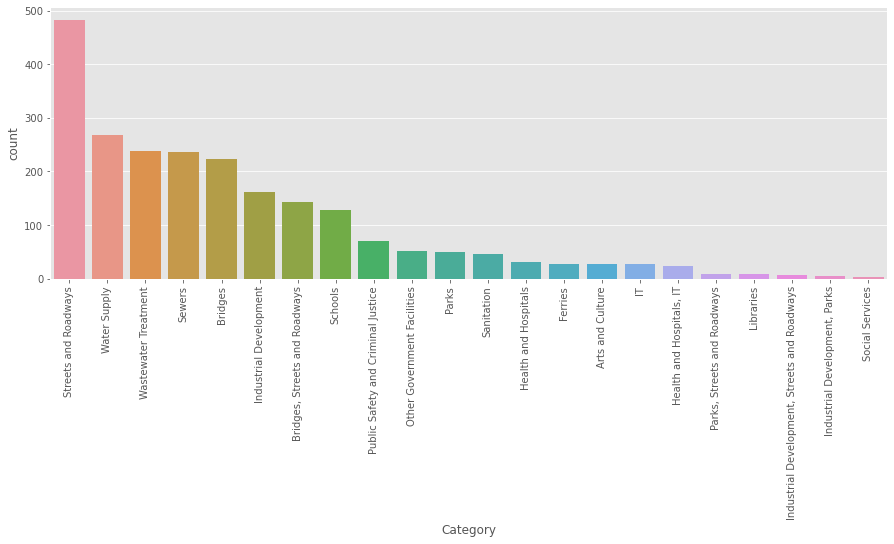

In [29]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=data["Category"], data=data, order = data['Category'].value_counts().index)
print(data["Category"].value_counts())

Some of the projects have multiple client agencies. The three biggest agencies are: DEP- the department of environmental protection, the DOT- department of transportation, and the DOE- department of education. 

DEP                    784
DOT                    267
DOE                    127
DCAS                    79
DSNY                    51
H+H                     50
DEP, DOT                45
DPR                     34
DCLA                    27
FDNY                    18
DEP, DOT, EDC           15
DOT, Mayor's Office     15
FDNY, NYPD              15
EDC                     13
NYPD                    11
DEP, EDC                10
DOC                     10
DHS                      8
DOHMH, HHC               7
WWC                      7
Mayor's Office           7
BWS                      6
BPL                      6
BWT                      6
ORR                      6
DSBS                     6
QL                       5
BTDS                     3
DOHMH                    3
ACS                      3
Name: Client Agency, dtype: int64


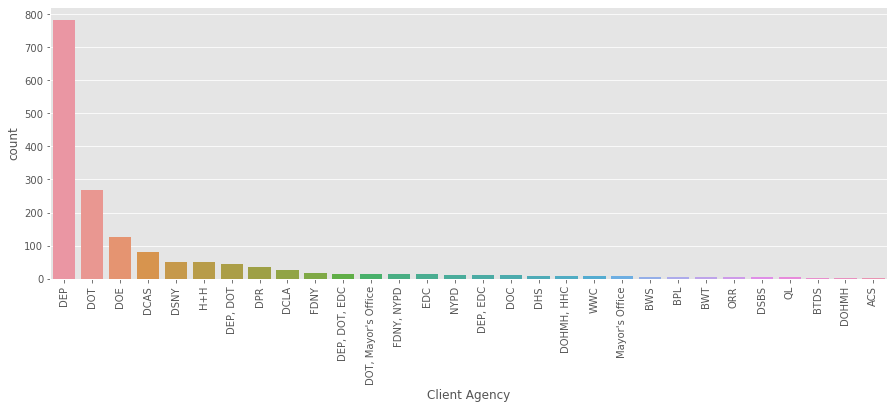

In [30]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=data["Client Agency"], data=data, order = data['Client Agency'].value_counts().index)
print(data["Client Agency"].value_counts())

Most of the projects are taking place in Brooklyn (455); there are approx. 280 projects occuring in both Queens and Manhatten. There are a few "Boroughs" listed that are not in NYC proper, Marlboro is in New Jersey and Carmel and "Upstate" are both upstate. The dataset notes that some sewer projects cross into many municipalities. 

In [18]:
data["Borough"].value_counts()

Brooklyn                           455
Queens                             288
Manhattan                          278
Bronx                              217
Staten Island                      122
Citywide                            94
Upstate                             30
Manhattan, Bronx                    25
New York                            20
Bronx, Manhattan                    15
Marlboro                            15
Carmel                              15
Port Jervis                         12
Valhalla                            12
Brooklyn, Queens                     9
Manhatten                            9
Olive                                8
Manhattan, Staten Island             5
Manhattan, Staten Island, Bronx      5
Name: Borough, dtype: int64

The PID field indicates is a unique identifier for each of the projects. The histogram below indates that there can be multiple project updates for a given project. In total, there are only 378 unique projects in the dataset. An example of a project with multiple updates is PID=3, which has 13 total entries. For a given project, the sum of "Latest Schedule Changes" will equal the "Total Schedule Changes" and the sum of "Latest Budget Changes" will equal the "Total Budget Changes." 

Number of unique projects in dataset 378


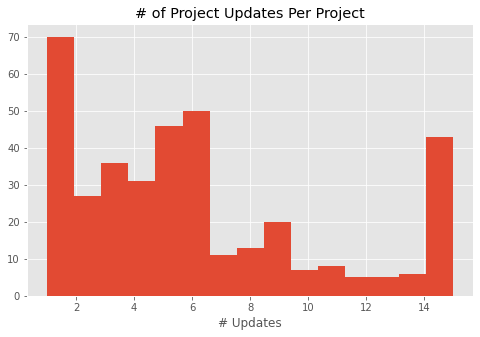

In [33]:
print('Number of unique projects in dataset',len(data.PID.unique()))

plt.figure(figsize=(8,5))
data.groupby(["PID"])['Date Reported As Of'].count().hist(bins=15)
plt.title("# of Project Updates Per Project")
plt.xlabel("# Updates")
plt.show()

IN the cell below, we examine one example project: PID=3

In [35]:
temp = data.copy()
temp['Date Reported As Of'] = pd.to_datetime(temp['Date Reported As Of'], infer_datetime_format=True)  
temp['Design Start'] = pd.to_datetime(temp['Design Start'], infer_datetime_format=True)

temp[temp.PID==3].sort_values('Date Reported As Of')

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,2014-05-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,2013-09-23,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,1.0,270.0
1,2015-02-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,187.0,270.0
2,2015-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,20.0,270.0
3,2016-01-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,3743944.0,-4318643.37,04/01/2020,-129.0,270.0
4,2016-06-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,2.0,-4318643.37,04/13/2020,12.0,270.0
5,2016-11-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.696747e+08,398313.0,-4318643.37,09/17/2020,157.0,270.0
6,2017-04-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.741774e+08,4502710.0,-4318643.37,11/30/2020,74.0,270.0
7,2017-09-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.751284e+08,950994.0,-4318643.37,04/28/2020,-216.0,270.0
8,2018-03-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.751594e+08,31015.0,-4318643.37,04/01/2020,-27.0,270.0
9,2018-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.770740e+08,1914587.0,-4318643.37,07/28/2020,118.0,270.0


In [36]:
1.829810e+08-14229191.

168751809.0

In [37]:
print('Sum of Latest Schedule Changes',temp[temp.PID==3]['Latest Schedule Changes'].sum())
print('Total Schedule Changes Column',temp[temp.PID==3]['Total Schedule Changes'].values[0])

Sum of Latest Schedule Changes 270.0
Total Schedule Changes Column 270.0


In [38]:
print('Sum of Latest Budget Changes',temp[temp.PID==3]['Latest Budget Changes'].sum())
print('Total Budget Changes Column',temp[temp.PID==3]['Total Budget Changes'].values[0])

Sum of Latest Budget Changes -4318643.0
Total Budget Changes Column -4318643.37


### 2.2. Potential Measures of Project Success
There are several considerations the city may care about in "predicting success". Presumably, the government would like projects completed on time and under budget and thus may be interested in the time behind schedule outcome, as well as amount over budget. Additionally, they may be interested in characteristics of "succesful" proposals, i.e. which proposals will move from the design space to actual construction. We discuss all of these potential outcomes below.  

### 2.2.1. Time Behind Schedule 
The first potential outcome we will explore is the time behind schedule. The variable "Total Schedule Changes" is the number of days behind on a project (where negative numbers represent being ahead of schedule). When we examine these outcome variables, we see very few projects are completed ahead of time, with most finishing from on time to 3 years late. On average, projects finish about two years behind schedule.  

In [40]:
print("Mean Time Behind Schedule: ", np.mean(data["Total Schedule Changes"]))

Mean Time Behind Schedule:  669.7182067703568


Text(0.5, 0, 'Days Behind Schedule')

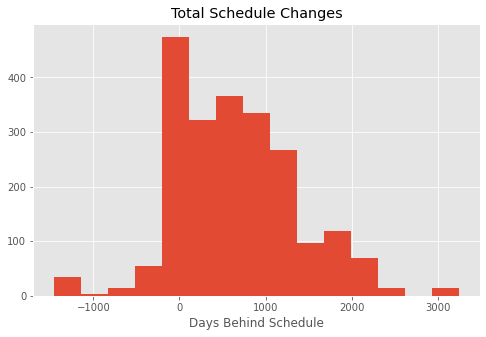

In [50]:
plt.figure(figsize=(8,5))
plt.hist(data["Total Schedule Changes"], bins=15)
plt.title("Total Schedule Changes")
plt.xlabel("Days Behind Schedule")

### 2.2.2. Total Budget Changes
The total budget changes are the number of dollars the project is over or under budget since the design start date. The mean budget change is a staggering 18 million dollars. While these are high dollar projects, the overall mean initial budget for all projects is around 150 million. So, on average, projects are over their budgets by a little over 12\%. It should be noted that this is largely driven by one outlier that was 800 million dollars over budget. We will have to consider what to do with this outlier, if we choose to investigate this outcome. 

In [45]:
print("Mean Budget Change: $", round(np.mean(data["Total Budget Changes"]),2))
print("Mean Total Budget: $", round(np.mean(data["Budget Forecast"]),2))
print("Percent of Budget Change: ", round(np.mean(data["Total Budget Changes"])/np.mean(data["Budget Forecast"]),4)*100)
print("Max Budget Change: $", (np.max(data["Total Budget Changes"])))

Mean Budget Change: $ 18387324.12
Mean Total Budget: $ 145650405.46
Percent of Budget Change:  12.620000000000001
Max Budget Change: $ 807802645.0


C:\Users\angyu\anaconda3\envs\cs109b\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\angyu\anaconda3\envs\cs109b\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Budget Changes (in millions)')

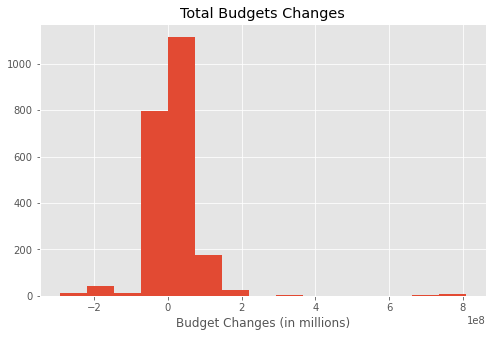

In [49]:
plt.figure(figsize=(8,5))
plt.hist(data["Total Budget Changes"], bins=15)
plt.title("Total Budgets Changes")
plt.xlabel("Budget Changes (in millions)")

### 2.2.3. Current Phase
We may want to be able to predict which projects will move from design to construction. This analysis may indicate something about characteristics of projects that merit funding but could also be informative in studying the committee who decides which projects to undertake. From an equity standpoint, we may be concerned if, for example, all of the design projects targeting Brooklyn are approved but none are approved in the Bronx. As we can see below, there are many more projects that are in the design phase (which is when design work is being performed that will be used for the construction bid) than in the Construction Procurement Phase (when the construction is actually taking place). This is likely because not all design projects make it to the construction procurement phase or have not done so within the time period of this dataset. We will not be able to study data from the earlies stages, as the scoping/planning projects don't seem to be represented in this dataset.  

In [51]:
data["Current Phase"].value_counts()

Design                      932
Construction                900
Construction Procurement    263
IT                           54
Scoping/Planning              4
Close-Out                     1
Name: Current Phase, dtype: int64

Text(0.5, 1.0, 'Current Phase')

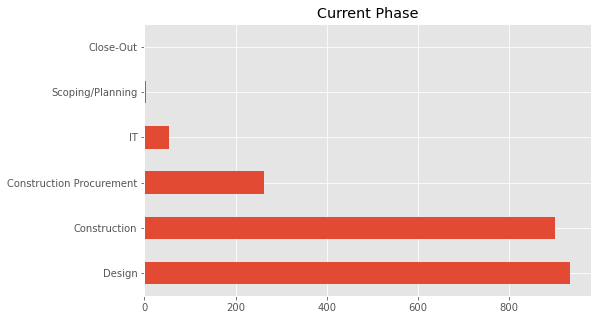

In [52]:
plt.figure(figsize=(8,5))
data["Current Phase"].value_counts().plot(kind='barh')
plt.title("Current Phase")

### 2.3. Relationship of the predictors

We would like to see some relationships of the variables, if any. To do that, first we would need to fix the data types (change the data type object from data type string to datetime, apply one hot encoding to categorical variables)

In [53]:
df = data.copy()
df['Date Reported As Of'] = pd.to_datetime(df['Date Reported As Of'], infer_datetime_format=True)  
df['Design Start'] = pd.to_datetime(df['Design Start'], infer_datetime_format=True)
display(df.head())
df.info()

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,2014-05-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,2013-09-23,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,1.0,270.0
1,2015-02-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,187.0,270.0
2,2015-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,20.0,270.0
3,2016-01-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,3743944.0,-4318643.37,04/01/2020,-129.0,270.0
4,2016-06-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,2.0,-4318643.37,04/13/2020,12.0,270.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date Reported As Of      2259 non-null   datetime64[ns]
 1   PID                      2259 non-null   int64         
 2   Project Name             2259 non-null   object        
 3   Description              2150 non-null   object        
 4   Category                 2259 non-null   object        
 5   Borough                  1634 non-null   object        
 6   Managing Agency          2259 non-null   object        
 7   Client Agency            1644 non-null   object        
 8   Current Phase            2154 non-null   object        
 9   Design Start             2095 non-null   datetime64[ns]
 10  Budget Forecast          2153 non-null   float64       
 11  Latest Budget Changes    1881 non-null   float64       
 12  Total Budget Changes     2194 non-

In [54]:
dummies = pd.get_dummies(df[['Category','Borough','Managing Agency','Current Phase']], drop_first=True)
df = pd.concat([df.drop(['Category','Borough','Managing Agency','Current Phase'], axis=1), dummies], axis=1)
df

,Date Reported As Of,PID,Project Name,Description,Client Agency,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,...,Managing Agency_DSNY,Managing Agency_EDC,Managing Agency_FDNY,Managing Agency_HHC,Managing Agency_SCA,Current Phase_Construction,Current Phase_Construction Procurement,Current Phase_Design,Current Phase_IT,Current Phase_Scoping/Planning
0,2014-05-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,...,0,0,0,0,0,0,0,1,0,0
1,2015-02-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,...,0,0,0,0,0,0,1,0,0,0
2,2015-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,...,0,0,0,0,0,0,1,0,0,0
3,2016-01-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.692764e+08,3743944.0,-4318643.37,04/01/2020,...,0,0,0,0,0,1,0,0,0,0
4,2016-06-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.692764e+08,2.0,-4318643.37,04/13/2020,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2019-09-01,1010,PRIOR NOTICE SIDEWALKS - BROOKLYN,PRIOR NOTICE SIDEWALKS - BROOKLYN,DOT,2015-08-06,2.942700e+07,NaN,NaN,05/13/2020,...,0,0,0,0,0,1,0,0,0,0
2255,2019-09-01,1011,"RECONSTRUCTION OF ROSEDALE AREA, PHASE 2",NaN,DOT,2018-06-07,3.936000e+07,NaN,NaN,08/14/2024,...,0,0,0,0,0,0,0,1,0,0
2256,2019-09-01,1012,"RECONSTRUCTION OF FRONT STREET, MANHATTAN","Reconstruction of Front Street, Manhattan",DOT,2015-07-31,2.735600e+07,NaN,NaN,06/16/2022,...,0,0,0,0,0,0,1,0,0,0
2257,2019-09-01,1013,"GRAND CONCOURSE, PHASE 5",THE FIFTH PHASE OF THE RECONSTRUCTION OF THE G...,DOT,2019-09-16,7.892100e+07,NaN,NaN,09/13/2025,...,0,0,0,0,0,0,0,1,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 67 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date Reported As Of                                    2259 non-null   datetime64[ns]
 1   PID                                                    2259 non-null   int64         
 2   Project Name                                           2259 non-null   object        
 3   Description                                            2150 non-null   object        
 4   Client Agency                                          1644 non-null   object        
 5   Design Start                                           2095 non-null   datetime64[ns]
 6   Budget Forecast                                        2153 non-null   float64       
 7   Latest Budget Changes                                  1881 non-null 

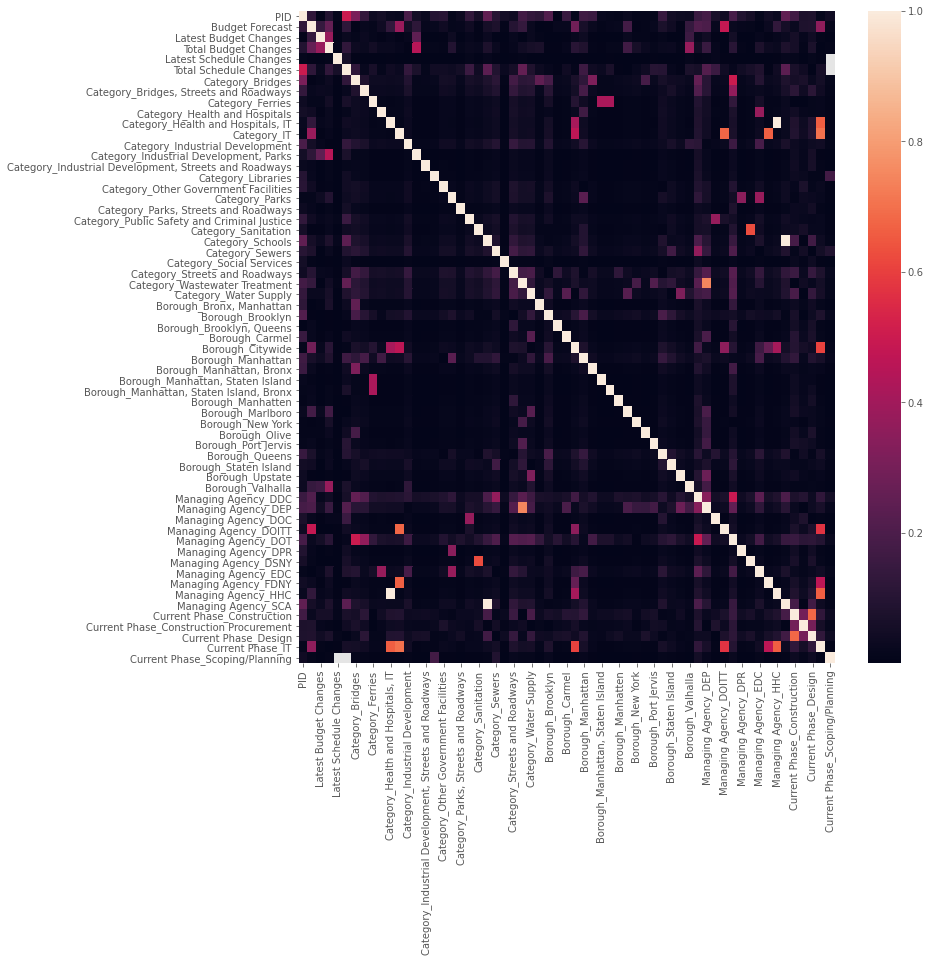

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df.corr()))

In [57]:
data_percent = data.copy()
data_percent['percent_latest_budget_change'] = data_percent['Latest Budget Changes']/data_percent['Budget Forecast']*100
data_percent['percent_total_budget_change'] = data_percent['Total Budget Changes']/data_percent['Budget Forecast']*100

We want to see if the budget changes is dependent on the budget forecast, so we build the scatterplot below. 
It seems like the lower the budget forecast, the higher the range of budget changes (which goes in either direction - positive and negative). Whats interesting is that while the latest budget change seems to be lower (more points in the negative side) while the total budget change seems to be higher (more points in the positive side).

(-300.0, 300.0)

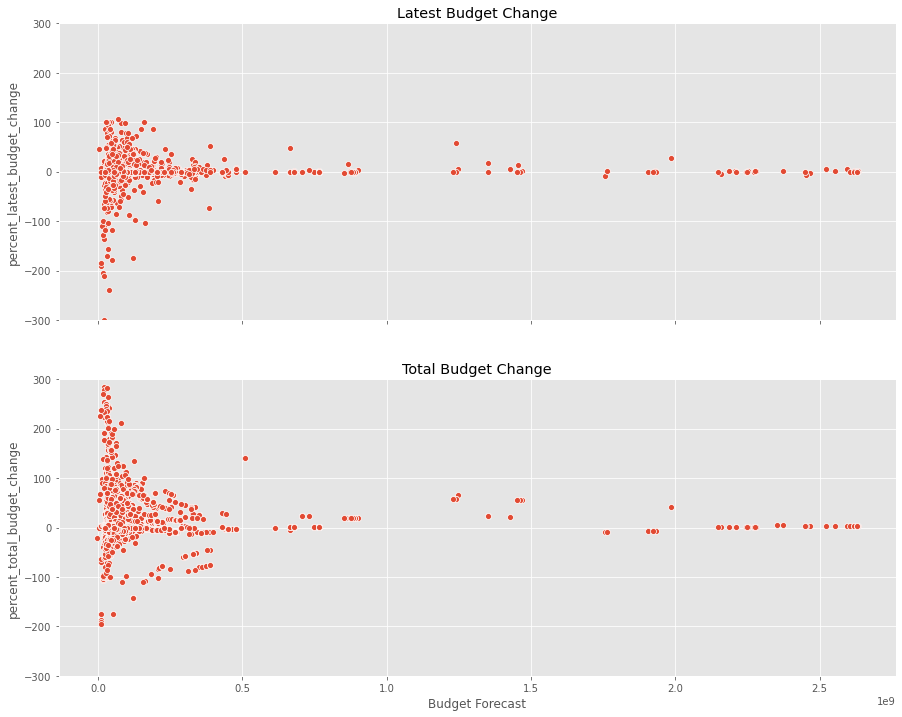

In [58]:
fig, ax =plt.subplots(2,1,figsize=(15,12), sharex=True,sharey=True)
sns.scatterplot(x='Budget Forecast',y ='percent_latest_budget_change',data = data_percent, ax=ax[0])
ax[0].set_title('Latest Budget Change')
sns.scatterplot(x='Budget Forecast',y ='percent_total_budget_change',data = data_percent, ax=ax[1])
ax[1].set_title('Total Budget Change')
plt.ylim([-300,300])

Now, we are going to explore how the latest and total budget changes vary across the phase, managing and client agency, borough, and category of the project.

<Figure size 432x288 with 0 Axes>

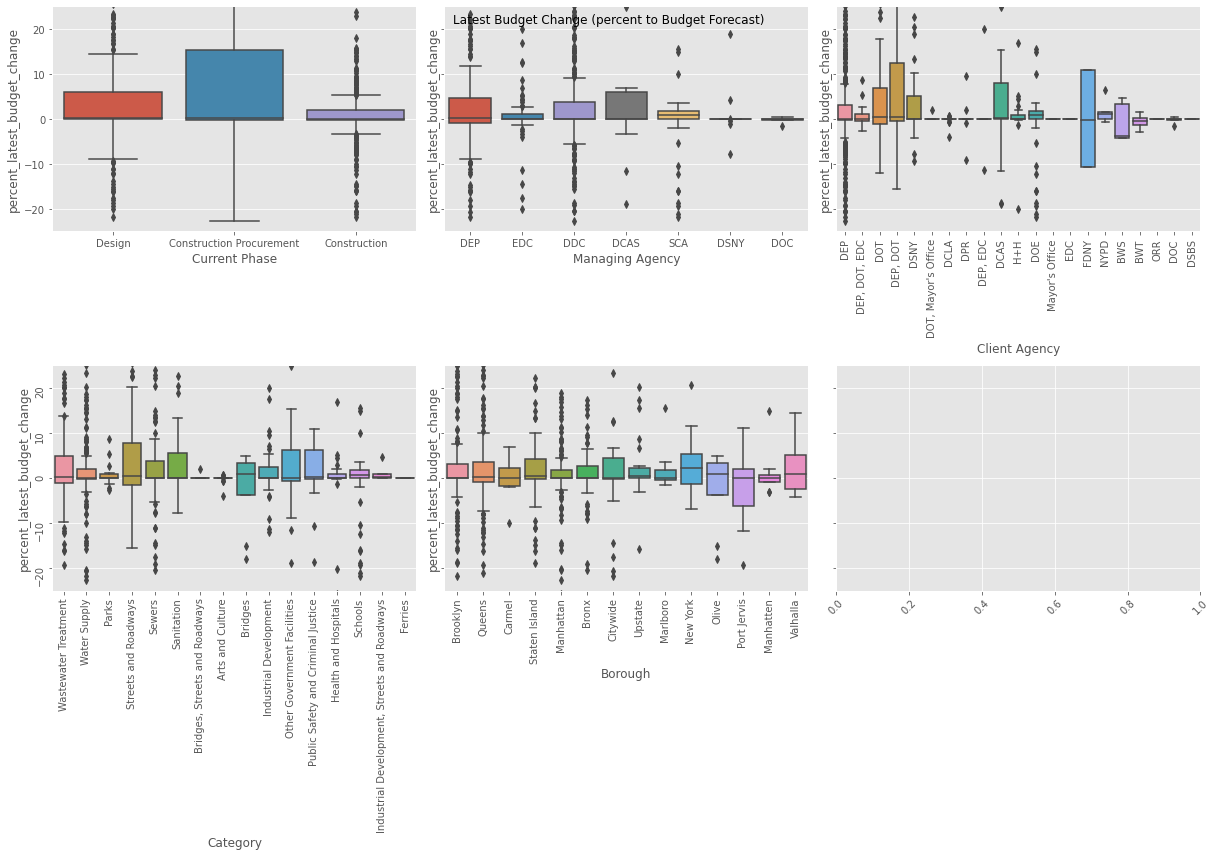

In [59]:
plt.tight_layout()
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
plt.ylim([-25,25])
plt.xticks(rotation=45, horizontalalignment='center')
fig.suptitle('Latest Budget Change (percent to Budget Forecast)')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

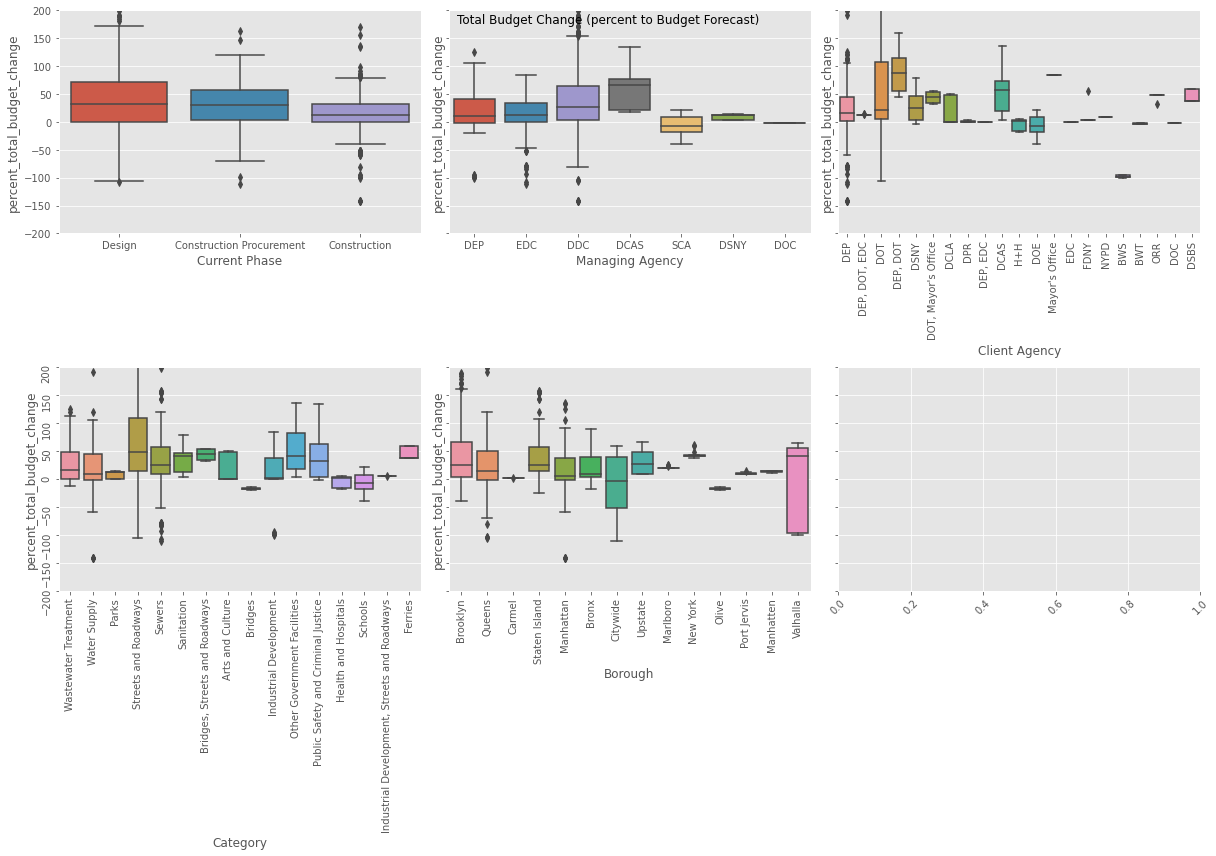

In [60]:
plt.tight_layout()
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
plt.ylim([-200,200])
plt.xticks(rotation=45, horizontalalignment='center')
fig.suptitle('Total Budget Change (percent to Budget Forecast)')
plt.tight_layout()

The same analysis was to be applied to the schedule changes. The below 2 plots shows how the schedule changes vary across the phase, managing and client agency, borough, and category of the project.

<Figure size 432x288 with 0 Axes>

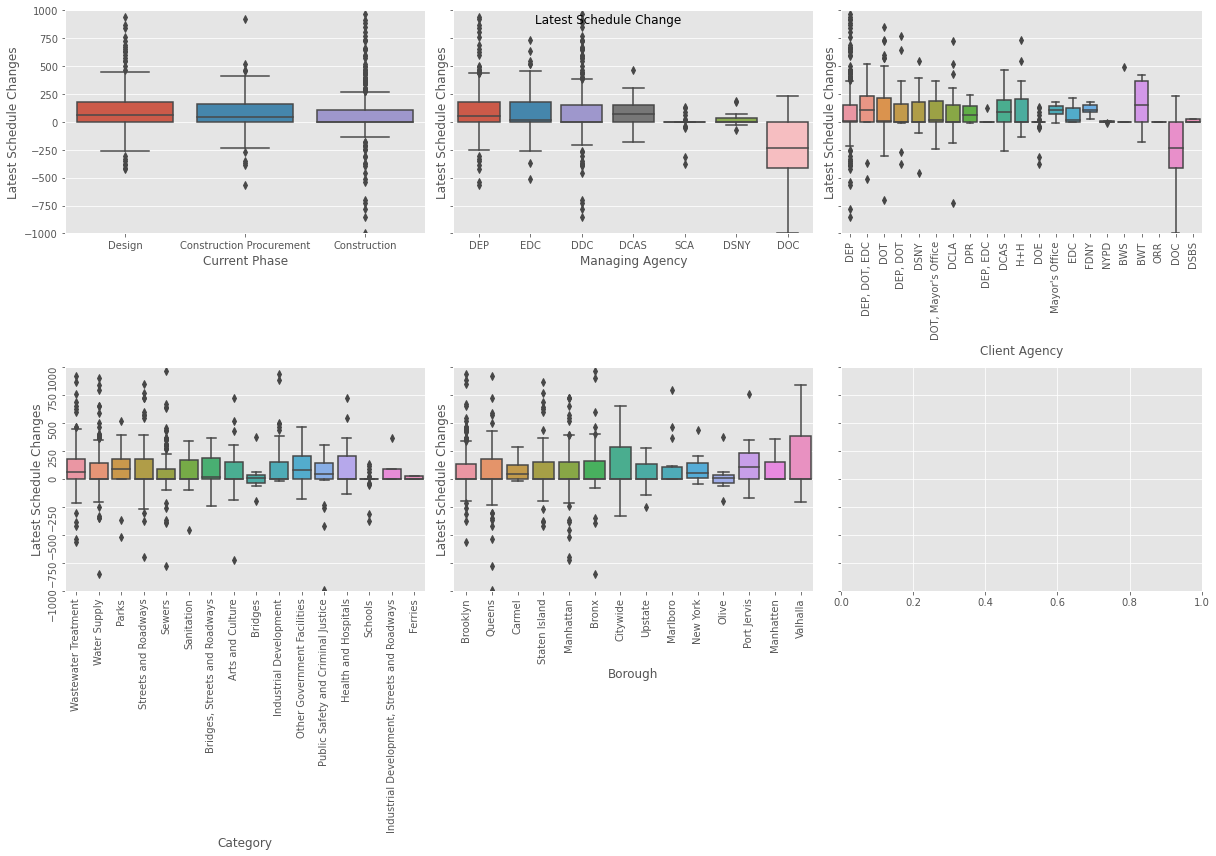

In [63]:
plt.tight_layout()
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
plt.ylim([-1000,1000])
fig.suptitle('Latest Schedule Change')
plt.tight_layout()

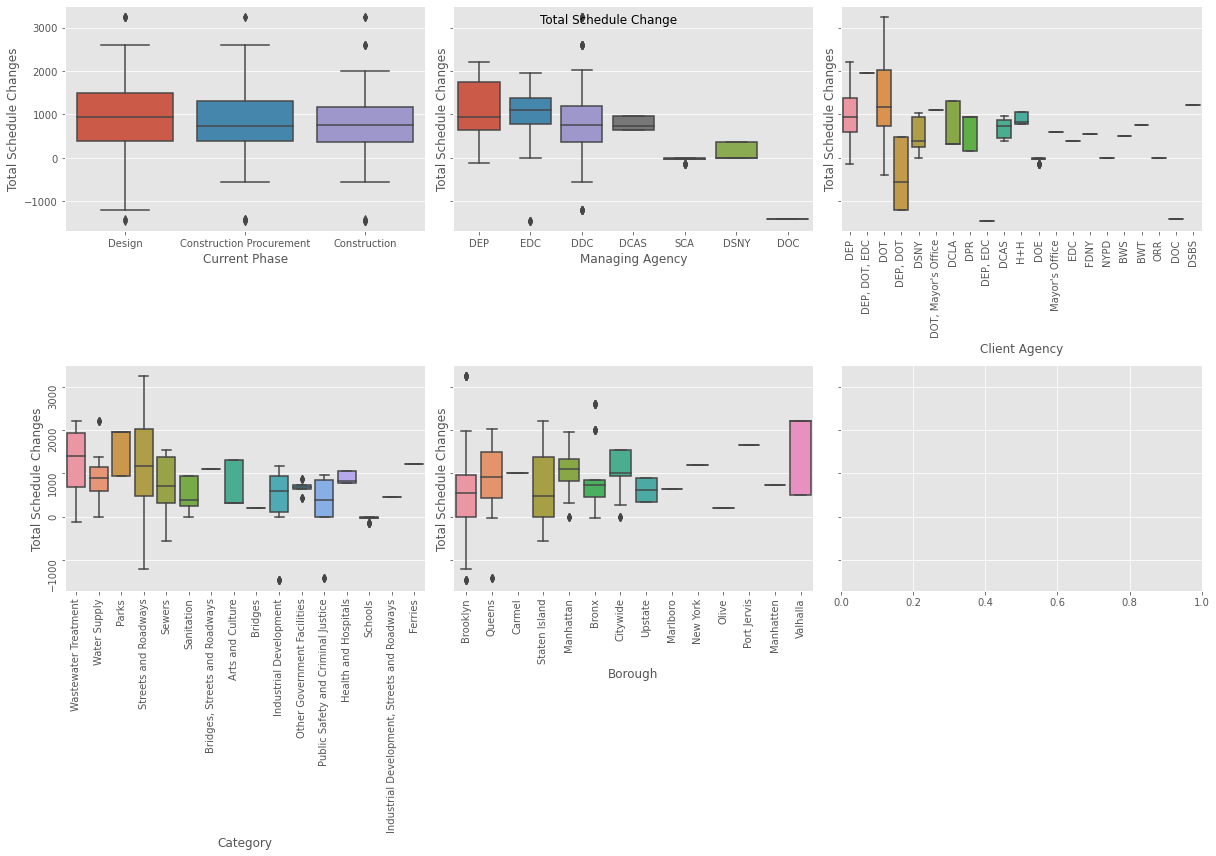

In [64]:
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
# plt.ylim([-1000,1000])
fig.suptitle('Total Schedule Change')
plt.tight_layout()

### 2.4. Supplementary Dataset
We found a another set of data which seems to supplement the main dataset provided. The Capital Project Schedules and Budget dataset has a total of over 10,000 rows which list capital projects within managing organization, phase status and project costs.

The data has 14 fields. The descriptions of these fields via the data dictionary on https://data.cityofnewyork.us/Housing-Development/Capital-Project-Schedules-and-Budgets/2xh6-psuqt are:
* Project Geographical District - District where building is located
* Project Building Identifier - Building ID
* Project School Name - School Name
* Project Type - Type of project based on funding
* Project Description - Component(s) of works to be done
* Project Phase Name - Example Scope, Design and Construction
* Project Status Name - Within phase in more detail
* Project Phase Actual Start Date - Date phase actually started
* Project Phase Planned End Date - Data phase actually completed
* Project Budget Amount - Award base budget by phase
* Final Estimate of Actual Costs through End of Phase Amount
* Total Phase Actual Spending Amount - Actual cumulative expenditure by phase
* DSF Number(s) - Number used to identify project in Five Year Plan

In [65]:
data2 = pd.read_csv('data/Capital_Project_Schedules_and_Budgets.csv')

In [66]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10796 entries, 0 to 10795
Data columns (total 14 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Project Geographic District                                 10796 non-null  int64  
 1   Project Building Identifier                                 10796 non-null  object 
 2   Project School Name                                         10796 non-null  object 
 3   Project Type                                                10796 non-null  object 
 4   Project Description                                         10796 non-null  object 
 5   Project Phase Name                                          10796 non-null  object 
 6   Project Status Name                                         10796 non-null  object 
 7   Project Phase Actual Start Date                             10796 non-null  object 
 

In [67]:
data2.head()

,Project Geographic District,Project Building Identifier,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Phase Actual Start Date,Project Phase Planned End Date,Project Phase Actual End Date,Project Budget Amount,Final Estimate of Actual Costs Through End of Phase Amount,Total Phase Actual Spending Amount,DSF Number(s)
0,1,M015,P.S. 15 - MANHATTAN,SCA CIP RESOA,FY17 RESO A IPDVS CAMERA INSTALLATION,Scope,Complete,12/01/2017,04/04/2018,12/28/2017,0,4663.0,4663.0,DSF: 0000844885
1,1,M015,P.S. 15 - MANHATTAN,SCA CIP RESOA,FY17 RESO A IPDVS CAMERA INSTALLATION,Design,Complete,12/28/2017,06/25/2018,02/06/2018,20100,18968.0,18779.0,DSF: 0000844885
2,1,M015,P.S. 15 - MANHATTAN,SCA CIP RESOA,FY17 RESO A IPDVS CAMERA INSTALLATION,Construction,In-Progress,06/26/2018,01/21/2019,NaN,294800,186092.0,156185.0,DSF: 0000844885
3,1,M015,P.S. 15 - MANHATTAN,SCA CIP RESOA,FY17 RESO A IPDVS CAMERA INSTALLATION,"CM, F&E",In-Progress,06/26/2018,01/21/2019,NaN,107773,107790.0,79589.0,DSF: 0000844885
4,1,M015,P.S. 15 - MANHATTAN,DOE - Skilled Trades,ACE STEAM SYSTEM OPTIMIZATION,Construction,Complete,10/06/2016,DOES,03/06/2019,DOES,42342.0,42342.0,DSF: 0000808159


In [68]:
data2.columns

Index(['Project Geographic District ', 'Project Building Identifier',
       'Project School Name', 'Project Type ', 'Project Description',
       'Project Phase Name', 'Project Status Name',
       'Project Phase Actual Start Date', 'Project Phase Planned End Date',
       'Project Phase Actual End Date', 'Project Budget Amount',
       'Final Estimate of Actual Costs Through End of Phase Amount',
       'Total Phase Actual Spending Amount', 'DSF Number(s)'],
      dtype='object')

In [75]:
print('Number of geographical districts:', data2["Project Geographic District "].nunique())

Number of geographical districts: 33


In [76]:
print('Number of project types:', data2["Project Type "].nunique())

Number of project types: 20


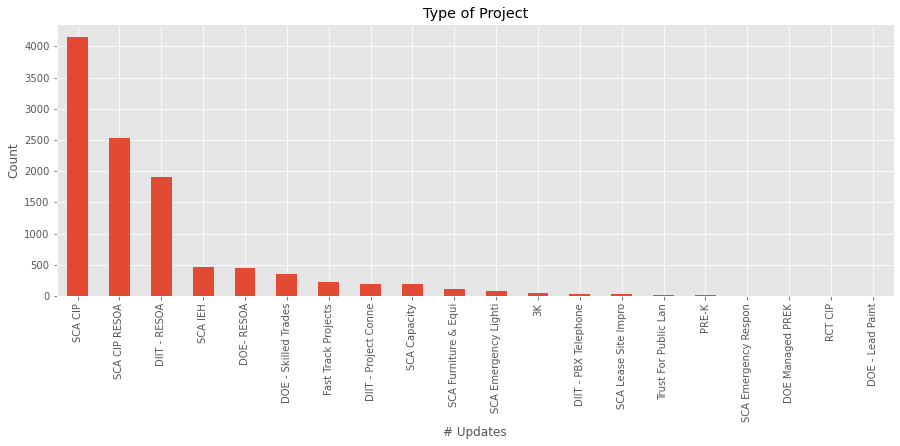

In [77]:
plt.figure(figsize=(15, 5))
pd.value_counts(data2['Project Type ']).plot.bar()
plt.title("Type of Project")
plt.ylabel('Count')
plt.xlabel("# Updates")
plt.show()

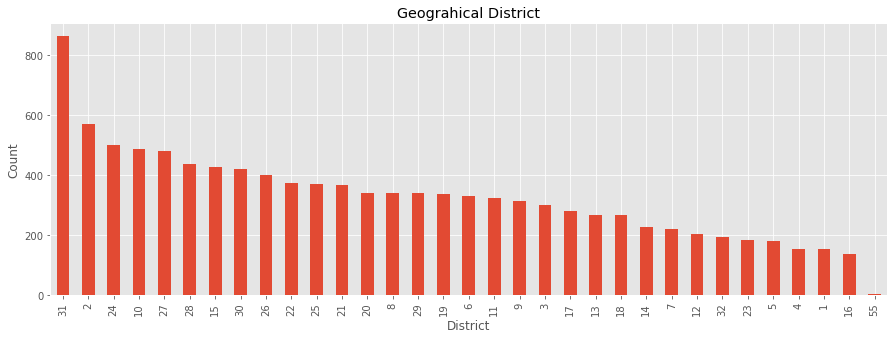

In [78]:
plt.figure(figsize=(15, 5))
pd.value_counts(data2['Project Geographic District ']).plot.bar()
plt.title("Geograhical District")
plt.ylabel('Count')
plt.xlabel("District")
plt.show()

In [80]:
data2.describe()

,Project Geographic District,Final Estimate of Actual Costs Through End of Phase Amount,Total Phase Actual Spending Amount
count,10796.000000,1.077400e+04,1.079600e+04
mean,18.012783,9.710903e+05,2.506023e+05
std,9.493052,5.752496e+06,1.751616e+06
min,1.000000,0.000000e+00,0.000000e+00
25%,10.000000,2.390150e+04,0.000000e+00
50%,19.000000,7.871850e+04,3.686000e+03
75%,27.000000,2.407322e+05,6.518600e+04
max,55.000000,3.128413e+08,5.805463e+07


In [81]:
data2_dropped = data2.dropna()

In [82]:
data2_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8038 entries, 0 to 10794
Data columns (total 14 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Project Geographic District                                 8038 non-null   int64  
 1   Project Building Identifier                                 8038 non-null   object 
 2   Project School Name                                         8038 non-null   object 
 3   Project Type                                                8038 non-null   object 
 4   Project Description                                         8038 non-null   object 
 5   Project Phase Name                                          8038 non-null   object 
 6   Project Status Name                                         8038 non-null   object 
 7   Project Phase Actual Start Date                             8038 non-null   object 
 8

## 3. Data Preparation and Modeling

Based on the literature, we figured that the outcomes (Target Variables) that reflect the "success" of the project includes *budget* and *schedule* changes. So we built separate models to predict each of these metrics separately.



### 3.1 Total Schedule Changes
### 3.1.1. Data Preparation
We created separate dataset for each prediction (for schedule changes and budget changes). As a first step, we remove all columns that are not used for prediction (such as the PID, date reported as of, etc.). At each model, we also kept one of the target variables only (to predict schedule changes, we drop all the target budget changes column, and vice versa). 

In [83]:
df = data.copy()
df['Date Reported As Of'] = pd.to_datetime(df['Date Reported As Of'])
df['Design Start']=pd.to_datetime(df['Design Start'])
df['Forecast Completion']=pd.to_datetime(df['Forecast Completion'])
df.drop(['PID'], axis=1, inplace=True)

# create a df for schedule prediction
df_sched = df.copy()

# drop budget related columns
df_sched.drop(['Budget Forecast', 'Latest Budget Changes','Total Budget Changes'], axis=1, inplace=True)

# calculate schedule changes as a percentage
df_sched['Timeline(days)'] = (df_sched['Forecast Completion']-df_sched['Design Start']).dt.days
df_sched['Total_Schedule_Changes_percent']=df_sched['Total Schedule Changes']/df_sched['Timeline(days)']

# drop unsued columns, left only the total schedule changes (as percentage) for the target variable
df_sched.drop(['Date Reported As Of', 'Design Start','Forecast Completion','Latest Schedule Changes', 'Total Schedule Changes', 'Timeline(days)'], axis=1, inplace=True)
display(df_sched.info())
display(df_sched.head())

# drop the rows that have null values for the schedule changes
df_sched = df_sched.dropna(subset=['Total_Schedule_Changes_percent'])
df_sched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Project Name                    2259 non-null   object 
 1   Description                     2150 non-null   object 
 2   Category                        2259 non-null   object 
 3   Borough                         1634 non-null   object 
 4   Managing Agency                 2259 non-null   object 
 5   Client Agency                   1644 non-null   object 
 6   Current Phase                   2154 non-null   object 
 7   Total_Schedule_Changes_percent  2037 non-null   float64
dtypes: float64(1), object(7)
memory usage: 141.3+ KB


None

,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Total_Schedule_Changes_percent
0,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,0.117188
1,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,0.108390
2,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,0.107527
3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,0.113350
4,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,0.112782


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 2203
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Project Name                    2037 non-null   object 
 1   Description                     2037 non-null   object 
 2   Category                        2037 non-null   object 
 3   Borough                         1525 non-null   object 
 4   Managing Agency                 2037 non-null   object 
 5   Client Agency                   1522 non-null   object 
 6   Current Phase                   2037 non-null   object 
 7   Total_Schedule_Changes_percent  2037 non-null   float64
dtypes: float64(1), object(7)
memory usage: 143.2+ KB



### 3.1.2. Modelling Description


For each prediction metrics, we developed a simple baseline model and 3 alternative approaches to determine the effectiveness of the different approaches:
- Approach A: Baseline, linear model using Category and Borough categorical features
- Approach B: Using TfidfVectorizer to vectorized the texts
- Approach C: Using Latent Dirichlet Allocation (LDA) to cluster the projects into "topics"
- Approach D: Using neural network that concatenates categorical features and embedding layer from text features  

In [156]:
X_train, X_test, y_train, y_test = train_test_split(df_sched.drop('Total_Schedule_Changes_percent', axis=1), 
                                                    df_sched['Total_Schedule_Changes_percent'], test_size=0.2)

In [157]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import re #regex
from sklearn.model_selection import GridSearchCV

### 3.1.3. Approach A -  Baseline model

Professor Grushka-Cockayne's presentation suggested that there were differences in performances between project categories and project boroughs. For comparison purposes, we produce a baseline model that includes project categories and boroughs as features in a linear model. The linear model is baseline model because it has the least complexity.
The categorical data is one-hot encoded after imputing missing values with a new category ('missing').

In [158]:
# create linear regression features
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])

features=FeatureUnion([('Category', categorical_transformer),
                       ('Borough', categorical_transformer),
                      ])
# create pipeline
linreg  = Pipeline(steps=[('feature', features), 
                      ('reg', LinearRegression())
                     ])
# fit linear model
linreg.fit(X_train, y_train)

# create predictions and compute scores
pred_train = linreg.predict(X_train)
pred_test = linreg.predict(X_test)
print("train:",r2_score(y_train, pred_train))
print("test:",r2_score(y_test, pred_test))
print()
print("train mse:",mean_squared_error(y_train, pred_train))
print("test mse:",mean_squared_error(y_test, pred_test))

train: 0.9219858441710885
test: 0.9025856291943416

train mse: 0.007272989875174247
test mse: 0.008692440105363608


### 3.1.4. Approach B -  Using text vectorization TfidfVectorizer 

#### Data Preprocessing

The idea is to create a pipeline, which includes the steps to transform each feature. 

- The **categorical data** is one-hot encoded after imputing missing values with a new category ('missing').

- The **text data** is vectorized, basically classifying the texts based on the words frequency. 
    - The standard way to do this is use Count Vectorizer, which counts the number of occurrences of each word. But in this case, we're going to use `TfidfVectorizer`. Tf-Idf takes into account the frequency of a word in a document, weighted by how frequently it appears in the entire corpus. Common words like “the” or “that” will have high term frequencies, but when we weigh them by the inverse of the document frequency, that would be 1 (because they appear in every document), and since TfIdf uses log values, that weight will actually be 0 since log 1 = 0. By comparison, if one document contains the word “bridge”, and it’s the only document on that topic out of a set of 100 documents, then the inverse frequency will be 100, so its Tf-Idf value will be boosted, signifying that the document is *uniquely* related to the topic of “bridge”. 
    
        To summarize, the `TfidfVectorizer` in sklearn will return a matrix with the tf-idf of each word in each document, with higher values for words which are specific to that document, and low (0) values for words that appear throughout the corpus.
        
    - We also use a custom tokenizer, which extracts only number-and-letter-based words and applies a stemmer. What a stemmer does is it reduces inflectional forms and derivationally related forms of a word to a common base form, so it reduces the feature space. For example, the Porter Stemmer we use here would reduce “modifying”, “modified”, “modifies” to just “modify”.

After we are done setting up the transformer pipelines for each feature, we then use `FeatureUnion` to combine all these transformer pipeline together for the entire dataset (basically assigning the right transformer to each predictor).


In [98]:
# Preprocessing
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
    
    
import nltk
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words


categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])


project_transformer = Pipeline([('colext', TextSelector('Project Name')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])

desc_transformer = Pipeline([('colext', TextSelector('Description')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])

features=FeatureUnion([('Project Name', project_transformer),
                       ('Description', desc_transformer),
                       ('Category', categorical_transformer),
                       ('Borough', categorical_transformer),
                       ('Managing Agency', categorical_transformer),
                       ('Client Agency', categorical_transformer),
                       ('Current Phase', categorical_transformer),
                      ])

#### Building the Regression Model for Prediction

We now append the regressor to preprocessing pipeline so we have a full prediction pipeline.
For the base model, we are going to use XGBoost to predict the schedule changes. We can utilize GridSearch to find the best combination of parameters to build the model.

In [103]:
reg_xgb = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15],
    'reg__learning_rate':[0.001, 0.01, 0.1],
    'reg__lambda':[0.5, 1, 1.5, 2.0],
    'reg__alpha':[0.5, 1, 1.5, 2.0],
}

search_xgb = GridSearchCV(reg_xgb, param_grid, n_jobs=4, scoring='r2')
search_xgb.fit(X_train, y_train)
print("Best parameter for XGBoost (CV score=%0.3f):" % search_xgb.best_score_)
print(search_xgb.best_params_)

Best parameter for XGBoost (CV score=0.854):
{'reg__alpha': 0.5, 'reg__lambda': 0.5, 'reg__learning_rate': 0.1, 'reg__max_depth': 15, 'reg__n_estimators': 100}


In [112]:
# build the model
reg_xgb = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor(max_depth= 15, n_estimators=100, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.1))
                     ])

reg_xgb.fit(X_train, y_train)
pred_train_xgb = reg_xgb.predict(X_train)
pred_test_xgb = reg_xgb.predict(X_test)
print("train:",r2_score(y_train, pred_train_xgb))
print("test:",r2_score(y_test, pred_test_xgb))
print()
print("train mse:",mean_squared_error(y_train, pred_train_xgb))
print("test mse:",mean_squared_error(y_test, pred_test_xgb))

train: 0.9361702400085563
test: 0.9050396294561586
train mse: 0.006007167685620642
test mse: 0.008130727728489936


In [107]:
reg_rf = Pipeline(steps=[('feature', features), 
                      ('reg', RandomForestRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15, 20],
}

search_rf = GridSearchCV(reg_rf, param_grid, n_jobs=4, scoring='r2')
search_rf.fit(X_train, y_train)
print("Best parameter for RandomForest (CV score=%0.3f):" % search_rf.best_score_)
print(search_rf.best_params_)

Best parameter for RandomForest (CV score=0.828):
{'reg__max_depth': 20, 'reg__n_estimators': 200}


In [113]:
# build the model
reg_rf = Pipeline(steps=[('feature', features), 
                      ('reg', RandomForestRegressor(max_depth= 20, n_estimators=200))
                     ])

reg_rf.fit(X_train, y_train)
pred_train_rf = reg.predict(X_train)
pred_test_rf = reg.predict(X_test)
print("train:",r2_score(y_train, pred_train_rf))
print("test:",r2_score(y_test, pred_test_rf))

print("train mse:",mean_squared_error(y_train, pred_train_rf))
print("test mse:",mean_squared_error(y_test, pred_test_rf))

train: 0.9123253422443687
test: 0.8578189471004405
train mse: 0.008251266666020336
test mse: 0.012173872349651614


#### Model Evaluation for TfidfVectorizer to Predict Schedule Changes

Best xgboost model using these parameter (highest R2 score from CV): max_depth= 15, n_estimators=100, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.1

Best Scores:
- $R^2$ from training set = 0.94
- $R^2$ from testing set = 0.90

### 3.1.5. Approach C: Using LDA to classify the projects into "topics"


In Natural Language Processing (NLP) lingo, the collection of description text (excerpt on the left) is known as a corpus. This is converted into a Document-Term-Matrix, where each listing is a document containing a matrix of terms. The NLTK and gensim packages were used to complete this.

To reduce the number of terms and focus on the most important per document, non-english and stop words are removed. Words are also lemmatised and a RegEx tokeniser is used to ignore non-alphanumeric strings. The remaining words are then converted into a bag-of-words representation (a list of word_id, word_frequency 2-tuples) for the Document-Term-Matrix. With this in place, we can use **Latent Dirichlet Allocation (LDA)** to discover topics inherent in the corpus, classify the corpus according to the learned topics and use them as features for the regression model.

- LDA is a generative Bayesian inference model that associates each document with a probability distribution over topics, where topics are probability distributions over words. It is an efficient way to analyse large volumes of text and is a more human interpretable method of topic modelling.

We chose to cluster the project (based on the *project name*) into 7 topics as it allowed for very distinct topics with no overlaps, making it a sensible choice to classify each listing. The 7 topics chosen is based on the "Category" listed in report *Procedures for Dealing with Optimism Bias in Transport Planning*, which was provided in the google drive for the project in https://drive.google.com/drive/folders/1fMBTMeaBk5yHuG3295oatM6ed1_SfIk3.

Similarly, we cluster the project (based on the project *description*) into 7 topics as well, also provided in the same report as mentioned above.

In [114]:
# run this in command line to download nltk data
# sudo python -m nltk.downloader -d /usr/local/share/nltk_data all

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel

import itertools
from collections import Counter
from collections import defaultdict

import json
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()


def preprocess_text(corpus):
    """Takes a corpus in list format and applies basic preprocessing steps of word tokenization,
     removing of english stop words, lower case and lemmatization."""
    processed_corpus = []
    english_words = set(nltk.corpus.words.words())
    english_stopwords = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        word_tokens = tokenizer.tokenize(row)
        word_tokens_lower = [t.lower() for t in word_tokens]
        word_tokens_lower_english = [t for t in word_tokens_lower if t in english_words or not t.isalpha()]
        word_tokens_no_stops = [t for t in word_tokens_lower_english if not t in english_stopwords]
        word_tokens_no_stops_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in word_tokens_no_stops]
        processed_corpus.append(word_tokens_no_stops_lemmatized)
    return processed_corpus

def nlp_model_pipeline(processed_corpus):
    """Takes processed corpus and produce dictionary, doc_term_matrix and LDA model"""
    # Creates the term dictionary (every unique term in corpus is assigned an index)
    dictionary = Dictionary(processed_corpus)
    # Convert corpus into Document Term Matrix using dictionary prepared above
    doc_term_matrix = [dictionary.doc2bow(listing) for listing in processed_corpus]    
    return dictionary, doc_term_matrix


def LDA_topic_modelling(doc_term_matrix, dictionary, num_topics=3, passes=2):
    # Create an object for LDA model and train it on Document-Term-Matrix
    LDA = LdaModel
    ldamodel = LDA(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=passes)
    return ldamodel

def add_topics_to_df(ldamodel, doc_term_matrix, df, new_col, num_topics):
    # Convert into Per-document topic probability matrix:
    docTopicProbMat = ldamodel[doc_term_matrix]
    docTopicProbDf = pd.DataFrame(index=df.index, columns=range(0, num_topics))
    for i, doc in enumerate(docTopicProbMat):
        for topic in doc:
            docTopicProbDf.iloc[i, topic[0]] = topic[1]
            
    docTopicProbDf = docTopicProbDf.apply(pd.to_numeric, errors = 'coerce') # change the type of object
    
    docTopicProbDf[new_col] = docTopicProbDf.idxmax(axis=1)
    df_topics = docTopicProbDf[new_col]
    # Merge with df
    df_new = pd.concat([df, df_topics], axis=1)
    return df_new


In [122]:
# for windows
# import nltk
# nltk.download('words')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [121]:
df_sched2 = df_sched.copy()

# Seperate NLP features
corpus = df_sched2['Project Name']
df_sched2 = df_sched2.drop(['Project Name'], axis = 1)

corpus_description = corpus.astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

# topics for projectname classification is based on the 7 categories provided report in the gdrive, 
# titled 'Procedures for Dealing with Optimism Bias in Transport Planning'
# link: https://drive.google.com/drive/folders/1fMBTMeaBk5yHuG3295oatM6ed1_SfIk3
n_topics=7
topics_label = {0:'Roads', 1:'Rail', 2:'Fixed_Links', 3:'Building_projects',4:'IT_projects',5:'Standard_civil_engineering', 6:'NonStandard_civil_engineering'}

ldamodel_description = LDA_topic_modelling(doc_term_matrix_description, dictionary_description, num_topics=n_topics)

df_sched2 = add_topics_to_df(ldamodel_description, doc_term_matrix_description, df_sched2, 
                            new_col='topics_projectname', num_topics=n_topics)


# Rename based on understanding of topics
df_sched2['topics_projectname'].replace(topics_label,inplace=True)
df_sched2 = pd.get_dummies(df_sched2, columns=['topics_projectname'], drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df_sched2.shape))


Dataset has 2037 rows, 14 columns.


In [123]:
df_sched3 = df_sched2.copy()

# topics for project description classification is based on the 18 types of projects in the provided report in the gdrive, 
# titled 'Procedures for Dealing with Optimism Bias in Transport Planning'
# link: https://drive.google.com/drive/folders/1fMBTMeaBk5yHuG3295oatM6ed1_SfIk3
n_topics=18
topics_label = {0:'Motorway',1:'Trunk roads',2:'Local roads',3:'Bicycle facilities',
              4:'Pedestrian facilities', 5:'Park and ride',6:'Bus lane schemes', 7:'Guided buses on wheels', 
              8:'Metro Light rail',9:'Guided buses on tracks', 10:'Conventional rail',11:'High speed rail',
              12:'Bridges', 13:'Tunnels', 14:'Stations Terminal buildings', 15:'IT_projects', 
              16:'Standard_civil_engineering', 17:'NonStandard_civil_engineering'}

corpus = df_sched3['Description']
df_sched3 = df_sched3.drop(['Description'], axis = 1)

corpus_description = corpus.astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

ldamodel_description = LDA_topic_modelling(doc_term_matrix_description, dictionary_description, num_topics=n_topics)

df_sched3 = add_topics_to_df(ldamodel_description, doc_term_matrix_description, df_sched3, 
                            new_col='topics_description', num_topics=n_topics)


# Rename based on understanding of topics
df_sched3['topics_description'].replace(topics_label,inplace=True)
df_sched3 = pd.get_dummies(df_sched3, columns=['topics_description'], drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df_sched3.shape))


Dataset has 2037 rows, 31 columns.


In [124]:
# Dummy encoding
categorical_feats = ['Category','Borough', 'Managing Agency', 'Client Agency', 'Current Phase']
df_sched3 = pd.get_dummies(df_sched3, columns=categorical_feats, drop_first=False)


# Create response and target variable
X_train, X_test, y_train, y_test = train_test_split(df_sched3.drop('Total_Schedule_Changes_percent', axis=1), 
                                                    df_sched3['Total_Schedule_Changes_percent'], test_size=0.2)

display(X_train)

,topics_projectname_Building_projects,topics_projectname_Fixed_Links,topics_projectname_IT_projects,topics_projectname_NonStandard_civil_engineering,topics_projectname_Rail,topics_projectname_Roads,topics_projectname_Standard_civil_engineering,topics_description_Bicycle facilities,topics_description_Bridges,topics_description_Bus lane schemes,...,Client Agency_H+H,Client Agency_Mayor's Office,Client Agency_NYPD,Client Agency_ORR,Client Agency_QL,Client Agency_WWC,Current Phase_Close-Out,Current Phase_Construction,Current Phase_Construction Procurement,Current Phase_Design
171,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2123,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1266,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
136,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2099,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
815,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1318,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
lda_reg_xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15],
    'lambda':[0.5, 1, 1.5, 2],
    'alpha':[0.5, 1, 1.5, 2],
}

search_lda_xgb = GridSearchCV(lda_reg_xgb, param_grid, n_jobs=2, scoring='r2')
search_lda_xgb.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_lda_xgb.best_score_)
print(search_lda_xgb.best_params_)

Best parameter (CV score=0.776):
{'alpha': 0.5, 'lambda': 0.5, 'max_depth': 15, 'n_estimators': 100}


In [129]:
lda_reg_xgb = XGBRegressor(max_depth=15, n_estimators=100, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.5)
lda_reg_xgb.fit(X_train, y_train)
pred_train_xgb = lda_reg_xgb.predict(X_train)
pred_test_xgb = lda_reg_xgb.predict(X_test)
print("train:",r2_score(y_train, pred_train_xgb))
print("test:",r2_score(y_test, pred_test_xgb))

train: 0.876343098371196
test: 0.8703267829491559


In [133]:
lda_reg_rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20],
}

search_lda_rf = GridSearchCV(lda_reg_rf, param_grid, n_jobs=2, scoring='r2')
search_lda_rf.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_lda_rf.best_score_)
print(search_lda_rf.best_params_)

Best parameter (CV score=0.786):
{'max_depth': 20, 'n_estimators': 300}


In [134]:
lda_reg_rf = RandomForestRegressor(max_depth=20, n_estimators=300)
lda_reg_rf.fit(X_train, y_train)
pred_train_rf = lda_reg_rf.predict(X_train)
pred_test_rf = lda_reg_rf.predict(X_test)
print("train:",r2_score(y_train, pred_train_rf))
print("test:",r2_score(y_test, pred_test_rf))

train: 0.8741877894851234
test: 0.8616043294554693


#### Model Evaluation for LDA to Predict Schedule Changes


Best xgboost model using these parameter (highest R2 score from CV): max_depth= 15, n_estimatros=100, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.5

Best Scores:
- $R^2$ from training set = 0.88
- $R^2$ from testing set = 0.87

This seems to show that the approach using LDA for text mining produces a better prediction for schedule changes.

In [131]:
#Display feature importance
def feature_importance(model, trainData, display_n_rows):
    """Display feature importance & weighting for tree based model"""
    fi = model.feature_importances_*100
    feat_imp = pd.DataFrame(list(zip(fi,trainData.columns.values)))
    feat_imp = feat_imp.sort_values(by=0, axis=0, ascending=False)
    feat_imp.columns = ['importance %', 'feature']
    print(feat_imp[:display_n_rows])#Display feature importance

#Display features & weighting
feature_importance(lda_reg_xgb, X_train, 20)

     importance %                                         feature
67      11.294369                             Managing Agency_DOC
39       7.725591                                Category_Schools
91       6.980799                              Client Agency_DSBS
80       5.348554                          Client Agency_DEP, DOT
64       5.209234                            Managing Agency_DCAS
47       5.176594                                Borough_Brooklyn
82       4.138495                          Client Agency_DEP, EDC
5        3.887187                        topics_projectname_Roads
50       3.823146                                Borough_Citywide
71       3.611249                             Managing Agency_EDC
22       3.449566  topics_description_Stations Terminal buildings
25       3.203680                       Category_Arts and Culture
43       2.452747                   Category_Wastewater Treatment
51       2.151622                               Borough_Manhattan
79       2

### 3.1.6. Approach D: Using neural network with embedding layer


A common NLP technique is to represent words as vectors. This approach became popular with the development of two word embedding models called word2vec and GloVe. The representation of words as vectors has several advantages. First, dense word vectors allow for two words to have similar word vectors if they are semantically or syntactically similar. Second, word embeddings have a lower dimensionality than a sparse, one-hot encoded embedding. 

We construct a neural network that leverages word embeddings as well as the categorical features used in prior models. The model concatenates the word embedding layer output and the input categorical features. The result is then passed through a nonlinear dense layer before the final linear dense layer.

We preprocess the categorical features in a similar way as in prior models, imputing missing values as "missing" and using a one-hot encoder. The "Project Name" and "Description" text fields are combined so that one embedding layer is used in the model. The input text goes through a series of cleaning steps: tokenization, stemming using the Porter Stemmer, special characters are removed, and tokens with numerical characters are removed. 



In [51]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.text import one_hot,text_to_word_sequence

from tensorflow.keras import  Sequential, layers,optimizers
from tensorflow.keras.models import model_from_json,Model
from tensorflow.keras.layers import Input, Embedding, Dense, TimeDistributed, \
                          Dropout, BatchNormalization,Flatten

In [44]:
# text cleaning
## tokenizer, stemmer, remove special characters, and remove words with numbers in them
def TokenizerNoNumerical(str_input):
    words = re.sub(r"[^A-Za-z0-9]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words if not any(map(str.isdigit, word))]
    return words

# text preprocessing
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy['Total Text'] = [p+' '+d for p,d in zip(X_train_copy['Project Name'],X_train_copy['Description'])]
X_test_copy['Total Text'] = [p+' '+d for p,d in zip(X_test_copy['Project Name'],X_test_copy['Description'])]
X_train_copy['Total Text'] = X_train_copy['Total Text'].map(TokenizerNoNumerical)
X_test_copy['Total Text'] = X_test_copy['Total Text'].map(TokenizerNoNumerical)

# get corpus word dictionary
words = sorted(set([w for s in X_train_copy['Total Text'] for w in s]+[w for s in X_test_copy['Total Text'] for w in s]))
word2idx = {wd:i for i,wd in enumerate(words)}
idx2word = {i:wd for wd,i in word2idx.items()}
num_words = len(words)

# maximum text length
max_length = max(X_train_copy['Total Text'].map(len).max(),X_test_copy['Total Text'].map(len).max())    

# text features 
## list of lists
X_train_text = [[word2idx[w] for w in s] for s in X_train_copy['Total Text']]
X_test_text = [[word2idx[w] for w in s] for s in X_test_copy['Total Text']]
## padded array
X_train_text = pad_sequences(X_train_text, maxlen=max_length, padding='post',truncating='post')
X_test_text = pad_sequences(X_test_text, maxlen=max_length, padding='post',truncating='post')

# function to create one-hot encode categorical features
def prepare_categorical_features(X_train,X_test):
    X_train = X_train.fillna('missing')
    X_test = X_test.fillna('missing')
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

# create categorical features
cat_features = ['Category','Borough','Managing Agency','Client Agency','Current Phase']
X_train_enc,X_test_enc = prepare_categorical_features(X_train_copy[cat_features],X_test_copy[cat_features])
cat_dim = X_train_enc.shape[1]


In [68]:
# Plot history
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1,len(loss)+1)

    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
 
 # model and training parameters 
n_units = 50
dim_embed = 30
batch_size = 32
epochs = 10
validation_split = 0.1
verbose = 1

# create model
text_input = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=num_words, output_dim=dim_embed, input_length=max_length)(text_input)
embedding_layer = Flatten()(embedding_layer)

cat_input = Input(shape=cat_dim)
x = layers.concatenate([embedding_layer, cat_input])
x = Dense(n_units,activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1)(x)
model = Model([text_input,cat_input],output,name='EmbeddingModel')

# compile model
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mse', metrics=['accuracy'])

# look at model architecture
print(model.summary())

# Train model
history = model.fit([X_train_text,X_train_enc], y_train, shuffle=True,batch_size=batch_size, epochs=epochs, 
                    validation_split=validation_split, verbose=verbose)


Model: "EmbeddingModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 355)]        0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 355, 30)      45510       input_18[0][0]                   
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 10650)        0           embedding_9[0][0]                
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 82)]         0                                            
_____________________________________________________________________________________

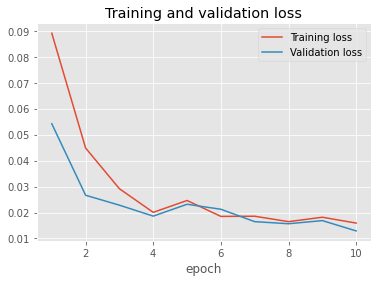

In [69]:
# plot of training/validation loss to check training convergence
plot_training_history(history)

In [70]:
# create prediction on both the training and test set
yhat_train = model.predict([X_train_text,X_train_enc])
yhat_test = model.predict([X_test_text,X_test_enc])

# r^2 and mse
print("train:",r2_score(y_train, yhat_train))
print("test:",r2_score(y_test, yhat_test))

print("train mse:",mean_squared_error(y_train, yhat_train))
print("test mse:",mean_squared_error(y_test, yhat_test))

train: 0.8985665723068695
test: 0.8281117294459317


## 3.2. Total Budget Changes

### 3.2.1. Data Preparation
We are going to apply similar approach as we did with the total schedule changes prediction. First, we preprocess the dataset to remove any columns related to budget changes, and then we also clean the budget data itself be removing missing values and infinity/-infinity values.


In [135]:
# create a df for schedule prediction
df_budget = df.copy()
# drop budget related columns
df_budget.drop(['Date Reported As Of', 'Design Start','Forecast Completion','Latest Schedule Changes', 'Total Schedule Changes'], axis=1, inplace=True)
# calculate budget changes as a percentage
df_budget['Total_Budget_Changes_percent']=df_budget['Total Budget Changes']/df_budget['Budget Forecast']
# drop unsued columns, left only the total schedule changes (as percentage) for the target variable
df_budget.drop(['Budget Forecast', 'Latest Budget Changes','Total Budget Changes'], axis=1, inplace=True)

display(df_budget.info())
df_budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Name                  2259 non-null   object 
 1   Description                   2150 non-null   object 
 2   Category                      2259 non-null   object 
 3   Borough                       1634 non-null   object 
 4   Managing Agency               2259 non-null   object 
 5   Client Agency                 1644 non-null   object 
 6   Current Phase                 2154 non-null   object 
 7   Total_Budget_Changes_percent  2100 non-null   float64
dtypes: float64(1), object(7)
memory usage: 141.3+ KB


None

,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Total_Budget_Changes_percent
0,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,-0.023602
1,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,-0.025592
2,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,-0.026089
3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,-0.025512
4,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,-0.025512


In [136]:
# drop missing values
df_budget = df_budget.dropna(subset=['Total_Budget_Changes_percent'])
# drop infinity/-infinity budget changes: there are 8 such cases
df_budget = df_budget[df_budget['Total_Budget_Changes_percent']>float("-inf")]
df_budget = df_budget[df_budget['Total_Budget_Changes_percent']<float("inf")]

display(df_budget.info())
df_budget.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2206
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Name                  2092 non-null   object 
 1   Description                   2092 non-null   object 
 2   Category                      2092 non-null   object 
 3   Borough                       1567 non-null   object 
 4   Managing Agency               2092 non-null   object 
 5   Client Agency                 1574 non-null   object 
 6   Current Phase                 2092 non-null   object 
 7   Total_Budget_Changes_percent  2092 non-null   float64
dtypes: float64(1), object(7)
memory usage: 147.1+ KB


None

,Total_Budget_Changes_percent
count,2092.000000
mean,0.245804
std,4.521021
min,-119.669966
25%,0.000000
50%,0.104010
75%,0.408455
max,122.929951


In [137]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_budget.drop('Total_Budget_Changes_percent', axis=1), 
                                                    df_budget['Total_Budget_Changes_percent'], test_size=0.2)

(array([4.000e+00, 3.000e+00, 6.000e+00, 0.000e+00, 4.950e+02, 1.538e+03,
        3.600e+01, 5.000e+00, 1.000e+00, 4.000e+00]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

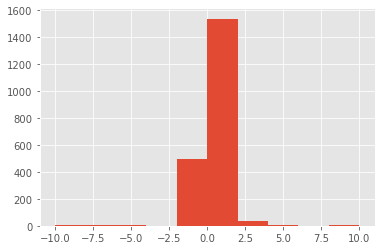

In [138]:
# Brendan: as you can see there are a lot of outliers
plt.hist(df_budget.Total_Budget_Changes_percent.clip(-10,10))

In [139]:
print(len(df_budget[df_budget.Total_Budget_Changes_percent<0]))
print(len(df_budget[df_budget.Total_Budget_Changes_percent>0]))

508
1494


(array([  13.,    3.,    7.,   49.,  436., 1272.,  218.,   42.,   22.,
          30.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <a list of 10 Patch objects>)

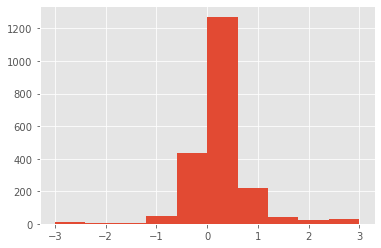

In [140]:
plt.hist(df_budget.Total_Budget_Changes_percent.clip(-3,3))

In [141]:
# Brendan: an alternative is to remove cases with extreme target variables
df_budget3 = df_budget[df_budget.Total_Budget_Changes_percent.abs()<3]
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_budget.drop('Total_Budget_Changes_percent', axis=1), 
                                                    df_budget['Total_Budget_Changes_percent'], test_size=0.2)

### 3.2.2 Modeling Description

We then implement similar modelling approaches to the dataset:
- Approach A: Baseline, linear model using Category and Borough categorical features
- Approach B: Using TfidfVectorizer to vectorized the texts
- Approach C: Using Latent Dirichlet Allocation (LDA) to cluster the projects into "topics"
- Approach D: Using neural network that concatenates categorical features and embedding layer from text features  

### 3.2.3.  Approach A -  Baseline

In [142]:
# create linear regression features
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])

features=FeatureUnion([('Category', categorical_transformer),
                       ('Borough', categorical_transformer),
                      ])
# create pipeline
linreg  = Pipeline(steps=[('feature', features), 
                      ('reg', LinearRegression())
                     ])
# fit linear model
linreg.fit(X_train2, y_train2)

# create predictions and compute scores
pred_train = linreg.predict(X_train2)
pred_test = linreg.predict(X_test2)
print("train:",r2_score(y_train2, pred_train))
print("test:",r2_score(y_test2, pred_test))

print("train mse:",mean_squared_error(y_train2, pred_train))
print("test mse:",mean_squared_error(y_test2, pred_test))

train: 0.4372224555746479
test: -1.6285320250374475
train mse: 13.597722725671503
test mse: 14.439413926742175


In [143]:
## Brendan: case using target variable filtered abs()>3

# create linear regression features
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])

features=FeatureUnion([('Category', categorical_transformer),
                       ('Borough', categorical_transformer),
                      ])
# create pipeline
linreg  = Pipeline(steps=[('feature', features), 
                      ('reg', LinearRegression())
                     ])
# fit linear model
linreg.fit(X_train3, y_train3)

# create predictions and compute scores
pred_train = linreg.predict(X_train3)
pred_test = linreg.predict(X_test3)
print("train:",r2_score(y_train3, pred_train))
print("test:",r2_score(y_test3, pred_test))

print("train mse:",mean_squared_error(y_train3, pred_train))
print("test mse:",mean_squared_error(y_test3, pred_test))

train: 0.5814138333701807
test: -5.0134226704541325
train mse: 9.895273028011946
test mse: 45.689603698717114


### 3.2.4.  Approach B -  Using text vectorization TfidfVectorizer 

In [144]:
# Preprocessing
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
    
    
import nltk
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words


categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])


project_transformer = Pipeline([('colext', TextSelector('Project Name')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])

desc_transformer = Pipeline([('colext', TextSelector('Description')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])

features=FeatureUnion([('Project Name', project_transformer),
                       ('Description', desc_transformer),
                       ('Category', categorical_transformer),
                       ('Borough', categorical_transformer),
                       ('Managing Agency', categorical_transformer),
                       ('Client Agency', categorical_transformer),
                       ('Current Phase', categorical_transformer),
                      ])

In [145]:
reg_xgb2 = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15],
    'reg__learning_rate':[0.001, 0.01, 0.1],
    'reg__lambda':[0.5, 1, 1.5, 2.0],
    'reg__alpha':[0.5, 1, 1.5, 2.0],
}

search2_xgb = GridSearchCV(reg_xgb2, param_grid, n_jobs=4, scoring='r2')
search2_xgb.fit(X_train2, y_train2)
print("Best parameter (CV score=%0.3f):" % search2_xgb.best_score_)
print(search2_xgb.best_params_)

Best parameter (CV score=0.013):
{'reg__alpha': 1.5, 'reg__lambda': 2.0, 'reg__learning_rate': 0.001, 'reg__max_depth': 15, 'reg__n_estimators': 300}


In [146]:
# build the model
reg2_xgb = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor(max_depth= 15, n_estimatros=50, reg_alpha= 1.5, reg_lambda= 2.0, learning_rate= 0.001))
                     ])

reg2_xgb.fit(X_train2, y_train2)
pred_train2_xgb = reg2_xgb.predict(X_train2)
pred_test2_xgb = reg2_xgb.predict(X_test2)
print("train:",r2_score(y_train2, pred_train2_xgb))
print("test:",r2_score(y_test2, pred_test2_xgb))

train: 0.04160258719392451
test: -0.022380669955022192


In [148]:
reg_rf2 = Pipeline(steps=[('feature', features), 
                      ('reg', RandomForestRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15, 20],
}

search2_rf = GridSearchCV(reg_rf2, param_grid, n_jobs=4, scoring='r2')
search2_rf.fit(X_train2, y_train2)
print("Best parameter (CV score=%0.3f):" % search2_rf.best_score_)
print(search2_rf.best_params_)

Best parameter (CV score=-0.469):
{'reg__max_depth': 20, 'reg__n_estimators': 100}


In [149]:
# build the model
reg2_rf = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor(max_depth= 20, n_estimatros=100))
                     ])

reg2_rf.fit(X_train2, y_train2)
pred_train2_rf = reg2_rf.predict(X_train2)
pred_test2_rf = reg2_rf.predict(X_test2)
print("train:",r2_score(y_train2, pred_train2_rf))
print("test:",r2_score(y_test2, pred_test2_rf))

train: 0.46450137062174257
test: -1.487435219699369


## 4. Discussion and Conclusion


The results from each approach for predicting percentage schedule changes:

Approach      | Train $r^2$   | Test $r^2$ | Train MSE   | Test MSE
:------------ | :-----------: | :--------: |  :--------: | :--------:
A. Linear Regression  | tbd  | tbd  | tbd  | tbd  
B. XGBoost TfIdf  | tbd  | tbd  | tbd  | tbd  
C. XGBoost LDA  | tdb  | tbd  | tbd  | tbd  
D. NN Embedding  | tdb  | tbd  | tbd  | tbd  

The results from each approach for predicting percentage budge changes:

Approach      | Train $r^2$   | Test $r^2$ | Train MSE   | Test MSE
:------------ | :-----------: | :--------: |  :--------: | :--------:
A. Linear Regression  | tbd  | tbd  | tbd  | tbd  
B. XGBoost TfIdf  | tbd  | tbd  | tbd  | tbd  
C. XGBoost LDA  | tdb  | tbd  | tbd  | tbd  
D. NN Embedding  | tdb  | tbd  | tbd  | tbd  

## References

Baker, B. N., Murphy, D. C., & Fisher, D. (1988). Factors affecting project success. In D. I. Cleland & W. R. King (Eds.), Project management handbook (2nd ed.), pp. 902-919. New York: Van Nostrand Reinhold.

Cleland, D. I. & Ireland, L. R. (2007). Project management: Strategic design and implementation (5th ed.). New York: McGraw-Hill.

Cooke-Davies, T. (2002). The “real” success factors on projects. International Journal of Project Management, 20(3), 185-190.

Cooke-Davies, T. (2004). Project success. In P. W. G. Morris & J. K. Pinto (Eds.). The Wiley guide to managing projects, pp. 99-122. Hoboken, NJ: John Wiley & Sons.

Kloppenborg, T. J. & Opfer W. A. (2002). The current state of project management research: Trends, interpretations, and prediction. Project Management Journal, 33(2), 5-18.

Koskela, L. & Howell, G. (2002). The underlying theory of project management is obsolete. Proceedings of the PMI Research Conference, 293-302.

Morris, P. W. G. (1994). The management of projects. London: Thomas Telford.

Morris, P. W. G. (2002). Science, objective knowledge, and the theory of project management. Proceedings of the Institution of Civil Engineers – Civil Engineering, 150(2), 82-90.

Pinto, J. K. (2004). The elements of project success. In D. I. Cleland (Ed.), Field guide to project management (2nd ed.), pp. 14-27. Hokoben, NJ: John Wiley & Sons.

Pinto, J. K. & Covin, J. C. (1989). Critical factors in project implementation: A comparison of construction and R&D projects. Technovation, 9(1), 49-62.

Sauer, C. & Reich, B. H. (2007). What do we want from a theory of project management? A response to Rodney Turner. International Journal of Project Management, 25(1), 1-2.

- https://medium.com/@chrisfotache/text-classification-in-python-pipelines-nlp-nltk-tf-idf-xgboost-and-more-b83451a327e0
- https://towardsdatascience.com/improving-airbnb-yield-prediction-with-text-mining-9472c0181731